In [237]:
import tensorflow as tf
from tensorflow.keras import models,layers,losses
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [238]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
import cv2
import os


In [243]:
#Another way to read all images
X_train = []
y_train = []
X_test = []
y_test = []
img_size = 224
labels = ['Parasitized','Uninfected'] 
for i in labels:
    folderPath = os.path.join('./Dataset/Train',i)
    for j in os.listdir(folderPath):
        image= cv2.imread(os.path.join(folderPath,j))
        image = cv2.resize(image,[img_size,img_size])
        #gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        #gray = cv2.GaussianBlur(gray, (5, 5), 0)
        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        #thresh = cv2.threshold(gray, 125, 255,0)[1]
        #thresh = cv2.applyColorMap(thresh, cv2.COLORMAP_JET)
        #thresh = cv2.erode(thresh, None, iterations=2)
        #thresh = cv2.dilate(thresh, None, iterations=2)
        X_train.append(image)
        y_train.append(labels.index(i))

for i in labels:
    folderPath = os.path.join('./Dataset/Test',i)
    for j in os.listdir(folderPath):
        image= cv2.imread(os.path.join(folderPath,j))
        image = cv2.resize(image,[img_size,img_size])
        #gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        #gray = cv2.GaussianBlur(gray, (5, 5), 0)
        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        #thresh = cv2.threshold(gray, 100, 125,0)[1]
        #thresh = cv2.applyColorMap(thresh, cv2.COLORMAP_JET)
        #thresh = cv2.erode(thresh, None, iterations=2)
        #thresh = cv2.dilate(thresh, None, iterations=2)
        X_test.append(image)
        y_test.append(labels.index(i))
        

In [244]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [245]:
X_train.shape, X_test.shape 

((3211, 224, 224, 3), (1000, 224, 224, 3))

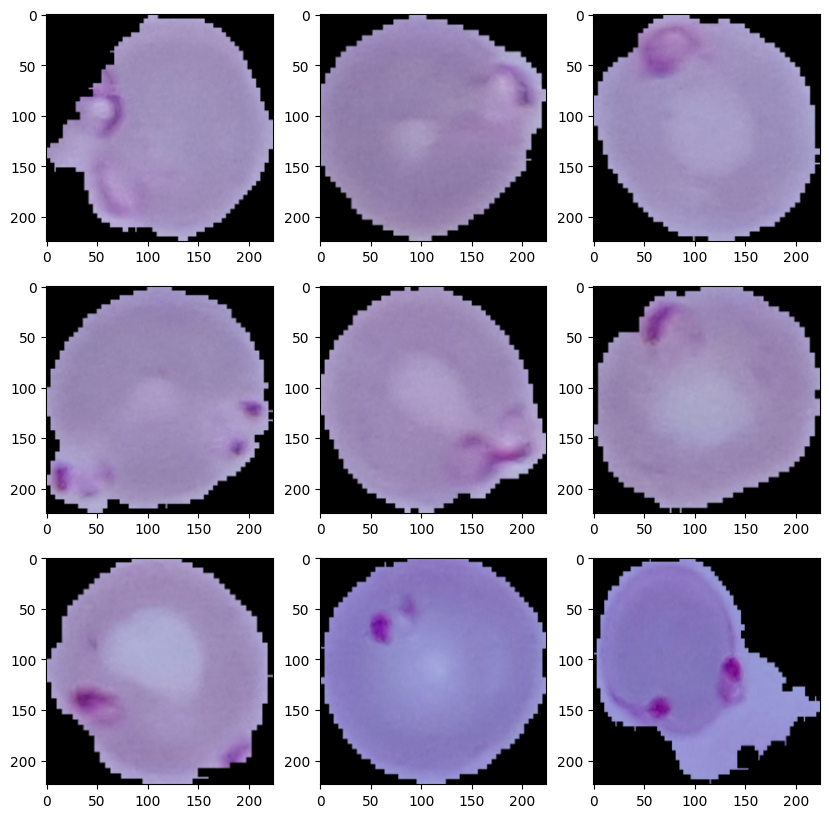

In [246]:
images = [X_train[i] for i in range(9)]
fig, axes = plt.subplots(3, 3, figsize = (10, 10))
axes = axes.flatten()
for img, ax in zip(images, axes):
    ax.imshow(img)
#plt.tight_layout()
plt.show()

In [247]:
X_train, y_train = shuffle(X_train,y_train, random_state=42) 

In [248]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) #Dividing the dataset into Training and Validation sets.
print(X_val.shape)
print(X_train.shape)
print(X_test.shape)

(643, 224, 224, 3)
(2568, 224, 224, 3)
(1000, 224, 224, 3)


In [249]:
y_val

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,

In [250]:
y_train = tf.keras.utils.to_categorical(y_train) #One Hot Encoding on the labels
y_test = tf.keras.utils.to_categorical(y_test)
y_val = tf.keras.utils.to_categorical(y_val)

In [251]:
#y_val

In [252]:
#use the image data generator to import the images from dataset
train_datagen = ImageDataGenerator(rescale = 1/255,rotation_range = 10,width_shift_range=.1,height_shift_range=.1,
                                   shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1/255)
train_set = train_datagen.flow(X_train,y_train, batch_size= 32)
test_set = test_datagen.flow(X_test,y_test, batch_size= 32)
val_set = train_datagen.flow(X_val,y_val, batch_size= 32)

In [253]:
len(train_set)

81

In [254]:
IMAGE_SIZE = [224,224]

In [255]:
#add preprocessing layer to the front of vgg
vgg= VGG19(input_shape = IMAGE_SIZE +[3], weights= 'imagenet', include_top= False) #include_top will remove first and last layer of vgg

#dont train existing weigths
for layer in vgg.layers:
    layer.trainable =False

#for getting no of classes
folders = glob("Dataset/Train/*")
folders,len(folders)

(['Dataset/Train\\Parasitized', 'Dataset/Train\\Uninfected'], 2)

In [256]:
# Customized layers
x = Flatten()(vgg.output)
pred = Dense(len(folders),activation='sigmoid')(x)

In [257]:
# create a model object
model = Model(inputs = vgg.input,outputs = pred)

In [258]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

                                                                 
 block3_conv4 (Conv2D)       (None, 56, 56, 256)       590080    
                                                                 
 block3_pool (MaxPooling2D)  (None, 28, 28, 256)       0         
                                                                 
 block4_conv1 (Conv2D)       (None, 28, 28, 512)       1180160   
                                                                 
 block4_conv2 (Conv2D)       (None, 28, 28, 512)       2359808   
                                                                 
 block4_conv3 (Conv2D)       (None, 28, 28, 512)       2359808   
                                                                 
 block4_conv4 (Conv2D)       (None, 28, 28, 512)       2359808   
                                                                 
 block4_pool (MaxPooling2D)  (None, 14, 14, 512)       0         
                                                                 
 block5_co

In [259]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [260]:
X_train.shape,y_train.shape 

((2568, 224, 224, 3), (2568, 2))

In [261]:
#fit the model
hist = model.fit_generator(train_set,validation_data=val_set,epochs=5,steps_per_epoch = len(train_set),validation_steps= len(val_set),verbose=1)

C:\Users\saras\AppData\Local\Temp\ipykernel_29744\126284265.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_set,validation_data=val_set,epochs=5,steps_per_epoch = len(train_set),validation_steps= len(val_set),verbose=1)


Epoch 1/5
81/81 [==============================] - 457s 6s/step - loss: 0.6196 - accuracy: 0.6994 - val_loss: 0.4744 - val_accuracy: 0.7465
Epoch 2/5
81/81 [==============================] - 427s 5s/step - loss: 0.4227 - accuracy: 0.8026 - val_loss: 0.3632 - val_accuracy: 0.8507
Epoch 3/5
81/81 [==============================] - 429s 5s/step - loss: 0.3741 - accuracy: 0.8407 - val_loss: 0.3974 - val_accuracy: 0.8165
Epoch 4/5
81/81 [==============================] - 392s 5s/step - loss: 0.3411 - accuracy: 0.8621 - val_loss: 0.3079 - val_accuracy: 0.8834
Epoch 5/5
81/81 [==============================] - 446s 6s/step - loss: 0.3029 - accuracy: 0.8754 - val_loss: 0.2939 - val_accuracy: 0.8802


In [262]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

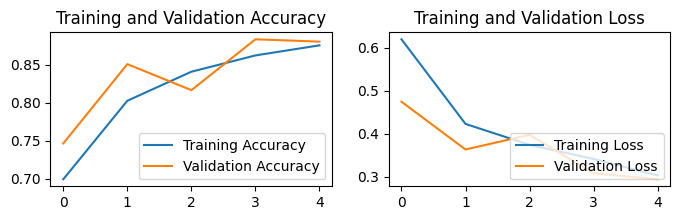

In [263]:
plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.legend(loc= "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.legend(loc= "lower right")
plt.title("Training and Validation Loss")

In [269]:
from keras.models import load_model
model.save('model_vgg19.h5')

c:\Users\saras\steffysara\VS_Code_Projects\Potato_Disease_Classifier\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [265]:
y_pred = model.predict(test_set)
y_pred

32/32 [==============================] - 121s 4s/step


array([[0.08523735, 0.907171  ],
       [0.08181002, 0.9173083 ],
       [0.92337006, 0.0835264 ],
       ...,
       [0.75373816, 0.21185045],
       [0.34391925, 0.6071135 ],
       [0.32749465, 0.6489293 ]], dtype=float32)

In [266]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [284]:
np.argmax(y_test, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [268]:
model = load_model('model_vgg19.h5')

In [267]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
predicted_classes = np.argmax(model.predict(X_test), axis = 1)
print(classification_report(np.argmax(y_test,axis=1), predicted_classes,target_names=['Parasite','Uninfected']))

32/32 [==============================] - 138s 4s/step
              precision    recall  f1-score   support

    Parasite       0.80      0.98      0.88       500
  Uninfected       0.98      0.75      0.85       500

    accuracy                           0.87      1000
   macro avg       0.89      0.87      0.87      1000
weighted avg       0.89      0.87      0.87      1000



In [271]:
from tensorflow.keras.preprocessing import image

In [279]:
#Predicting a particiular image
labels = ['Parasitized','Uninfected']
path =r".\Dataset\Test\Uninfected\C47P8thinOriginalOlympusCX21_IMG_20150717_173554_cell_58.png"
img=image.load_img(path,target_size=(224,224))
x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
predict_image1 = model.predict(x)
indices1 = predict_image1.argmax()
print(labels[indices1])

1/1 [==============================] - 0s 254ms/step
Uninfected


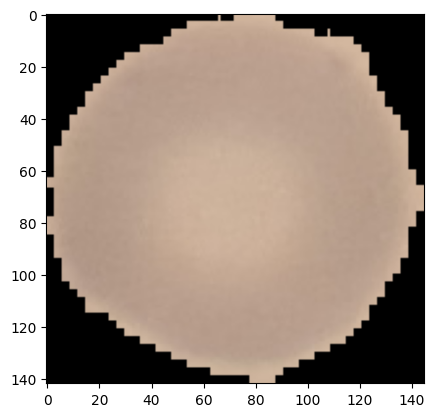

In [280]:
img = image.load_img(path)
plt.imshow(img)


125/125 [==============================] - 122s 974ms/step


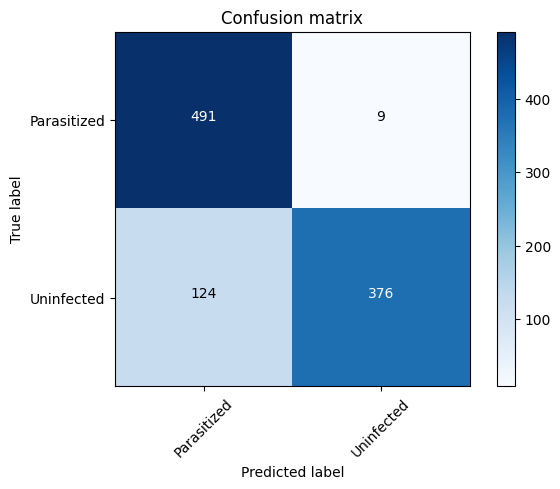

In [281]:
import itertools
pred_Y = model.predict(X_test, batch_size = 8, verbose = True)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names=['Parasitized','Uninfected']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test, batch_size=8)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred_Y,axis = 1) 
# Convert validation observations to one hot vectors
# compute the confusion matrix
rounded_labels=np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(rounded_labels, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

125/125 [==============================] - 126s 1s/step


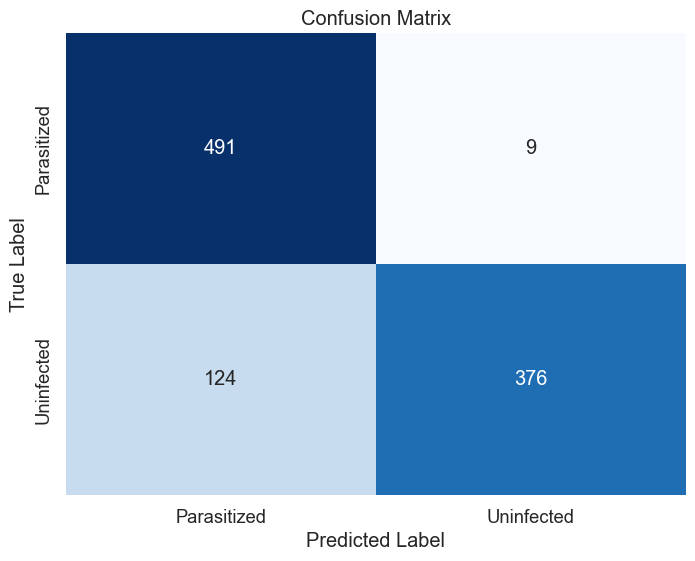

In [287]:
from sklearn.metrics import confusion_matrix

# Example predicted and true labels
# Replace these with your actual predicted and true labels
y_pred = model.predict(X_test, batch_size=8)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Define class labels
class_labels = ['Parasitized','Uninfected']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()